In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import PchipInterpolator

mpl.rc('font', size=20)

In [7]:
#My mDOM data using Chris' effvol vs. absorption length relation
data_mDOM = np.genfromtxt("../files/mDOM_effvol.txt", delimiter=" ", dtype=float)
depth_md, effvol_md = data_mDOM.T
depth_md = 1948.07-depth_md

#WOM-Trap effective volume (mDOM + 2 WLS tubes) ~ 1.81 mDOM effective volume
effvol_wls = 1.81 * effvol_md

#Benedikt's effective volume for the IC80 DOMs
data_i3 = np.genfromtxt("../files/effectivevolume_benedikt_AHA_normalDoms.txt",
                    delimiter=" ", dtype=float)
depth_i3, effvol_i3 = data_i3.T
depth_i3 = 1948.07-depth_i3 #depth relative to the surface

#HQE DOMs have a 1.35 higher QE PMTs
effvol_dc = effvol_i3*1.35

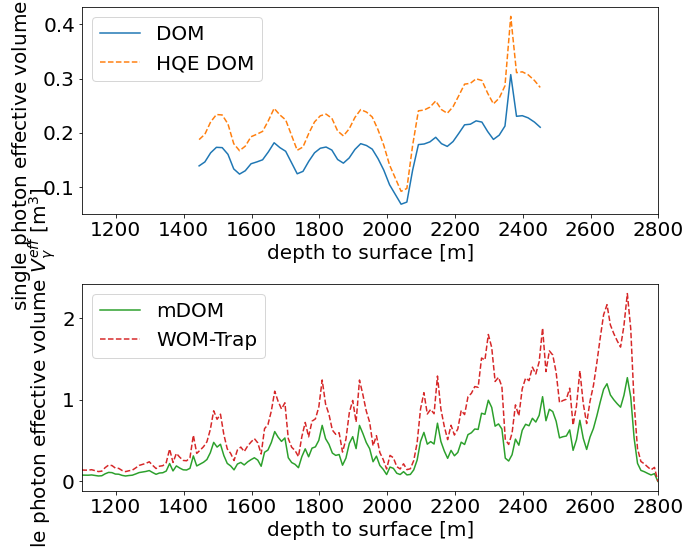

In [11]:
fig, ax = plt.subplots(2,1, figsize = (10,8))

ax[0].plot(depth_i3, effvol_i3, label = r"DOM", color = 'C0', ls = '-')
ax[0].plot(depth_i3, effvol_dc, label = r"HQE DOM", color = 'C1', ls = '--')
ax[1].plot(depth_md, effvol_md, label = r"mDOM", color = 'C2', ls = '-')
ax[1].plot(depth_md, effvol_wls, label = r"WOM-Trap", color = 'C3', ls = '--')

for j in range(2):   
    ax[j].set_xlabel("depth to surface [m]")
    ax[j].set_ylabel(r"single photon effective volume $V_{\gamma}^{eff}$ [m$^3$]")
    ax[j].legend()


    
ax[0].set_xlim((1100,2800))
ax[1].set_xlim((1100,2800))
plt.tight_layout()
plt.savefig('./plots/effvol.pdf', dpi = 300)

In [24]:
print(np.median(effvol_i3))
print(np.median(effvol_dc))
print(np.median(effvol_md))
print(np.median(effvol_wls))

0.17050561795
0.23018258423250001
0.3292575553
0.595956175093


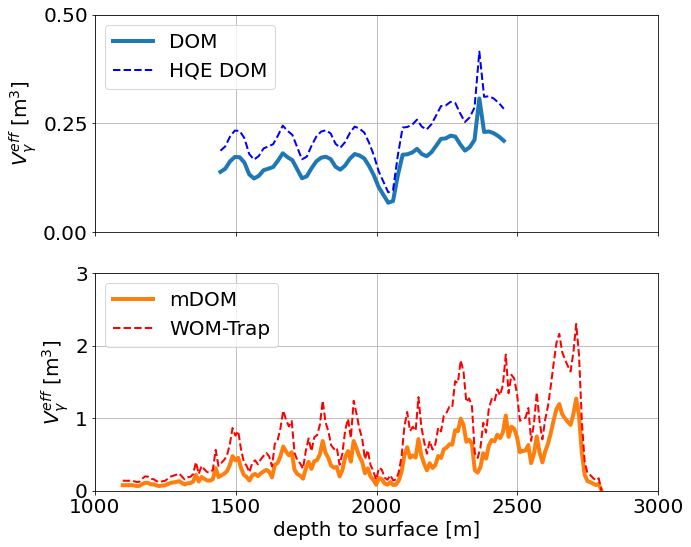

In [40]:
fig, ax = plt.subplots(2,1, figsize = (10,8), sharex=True)

ax[0].plot(depth_i3, effvol_i3, label = r"DOM", color = 'C0', ls = '-', lw = 4)
ax[0].plot(depth_i3, effvol_dc, label = r"HQE DOM", color = 'blue', ls = '--', lw = 2)
ax[1].plot(depth_md, effvol_md, label = r"mDOM", color = 'C1', ls = '-', lw = 4)
ax[1].plot(depth_md, effvol_wls, label = r"WOM-Trap", color = 'red', ls = '--', lw = 2)

for j in range(2):   
    ax[j].set_ylabel(r"$V_{\gamma}^{eff}$ [m$^3$]")
    ax[j].grid()
    ax[j].legend()

ax[1].set_xlabel("depth to surface [m]")
    
#ax[0].set_xticks([1000,1500,2000,2500,3000])
ax[0].set_yticks([0,0.25,0.5])
ax[1].set_xticks([1000,1500,2000,2500,3000])
ax[1].set_yticks([0,1,2,3])
    
ax[0].set_xlim((1000,3000))
ax[1].set_xlim((1000,3000))
ax[1].set_ylim((0,3))

plt.tight_layout()
plt.savefig('./plots/effvol.pdf', dpi = 300)